In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sharp.qoi import QOI_OBJECTS
from mlresearch.utils import set_matplotlib_style
set_matplotlib_style(32, **{"font.family":"Times"})

/home/jfonseca/miniconda3/envs/sharp/lib/python3.11/site-packages/mlresearch/utils/_visualization.py:72: UserWarning: Could not find a LaTeX installation. ``text.usetex`` will be set to False.
  warnings.warn(warn_msg)


# Define functions and general settings

In [2]:
directory = 'synthetic-data-results'

colors = {
    "Bernoulli": np.array((149, 163, 195)),
    "Uniform": np.array((114, 182, 161)) - 30,
    "Uniform 1": np.array((114, 182, 161)) - 30,
    "Uniform 2": np.array((114, 182, 161)) + 30,
    "Gaussian": np.array((229, 201, 73)) - 30,
    "Gaussian 1": np.array((229, 201, 73)) - 30,
    "Gaussian 2": np.array((229, 201, 73)) + 30,
    r"Gauss. ($\sigma=0.10$)": np.array((229, 201, 73)) - 30,
    r"Gauss. ($\sigma=0.05$)": np.array((229, 201, 73)) + 30,
}

palette = {k: (np.clip(v, 0, 255) / 255).tolist() for k, v in colors.items()}

mapper = {
    "u": "Uniform",
    "u1": "Uniform 1",
    "u2": "Uniform 2",
    "b": "Bernoulli",
    "n": "Gaussian",
    "nl": r"Gauss. ($\sigma=0.10$)",
    "ns": r"Gauss. ($\sigma=0.05$)",
    "n1": "Gaussian 1",
    "n2": "Gaussian 2",

}

qoi_names = [
    v.__name__.lower()
    for k, v 
    in QOI_OBJECTS.items() 
    if v._qoi_type == "rank"
]
qoi_names

['rankingqoi', 'rankingscoreqoi', 'topkqoi']

In [3]:
def ranks_analysis_shapley(df_name, qoi_name=None, contribution_to="ranking"):
    """Analysis of Ranks using Shapley values"""
    df_80 = pd.read_csv(directory + f'/{df_name}_{qoi_name}_80.csv', index_col="Unnamed: 0")
    df_50 = pd.read_csv(directory + f'/{df_name}_{qoi_name}_50.csv', index_col="Unnamed: 0")
    df_20 = pd.read_csv(directory + f'/{df_name}_{qoi_name}_20.csv', index_col="Unnamed: 0")
    
    rows = df_80.shape[0]
    buckets = 10
    
    # Make 5 rank buckets for all datasets
    df_80['rank stratum'] = [
        r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
        else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
        for rank in df_80['ranking']
    ]
    df_50['rank stratum'] = [
        r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
        else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
        for rank in df_50['ranking']
    ]
    df_20['rank stratum'] = [
        r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
        else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
        for rank in df_20['ranking']
    ]
    
    # Preprocess datasets
    df_80.rename(columns=mapper, inplace=True)
    df_50.rename(columns=mapper, inplace=True)
    df_20.rename(columns=mapper, inplace=True)

    df_80 = df_80.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
    df_50 = df_50.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
    df_20 = df_20.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})

    df_80 = df_80.sort_values("rank stratum")
    df_50 = df_50.sort_values("rank stratum")
    df_20 = df_20.sort_values("rank stratum")

    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharey=True, sharex=True, constrained_layout=True)
    # plt.subplots_adjust(hspace=0.5)

    graph = sns.boxplot(ax=axs[0], x=df_80['rank stratum'], y=df_80['Contribution'],
                        hue=df_80['Feature'], palette=palette)
    sns.move_legend(
        graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )
    
    graph.set_ylabel(None)
    graph.set_xlabel(None)
    # graph.axhline(0)

    graph = sns.boxplot(ax=axs[1], x=df_50['rank stratum'], y=df_50['Contribution'],
                        hue=df_50['Feature'], palette=palette)
    graph.set_ylabel(f"contribution to {contribution_to}")
    graph.set_xlabel(None)
    graph.get_legend().remove()
    # graph.axhline(0)

    graph = sns.boxplot(ax=axs[2], x=df_20['rank stratum'], y=df_20['Contribution'],
                        hue=df_20['Feature'], palette=palette)
    graph.set_ylabel(None)
    graph.get_legend().remove()
    # graph.axhline(0)
    
    return fig, axs

# Analysis of Ranks using Shapley values

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

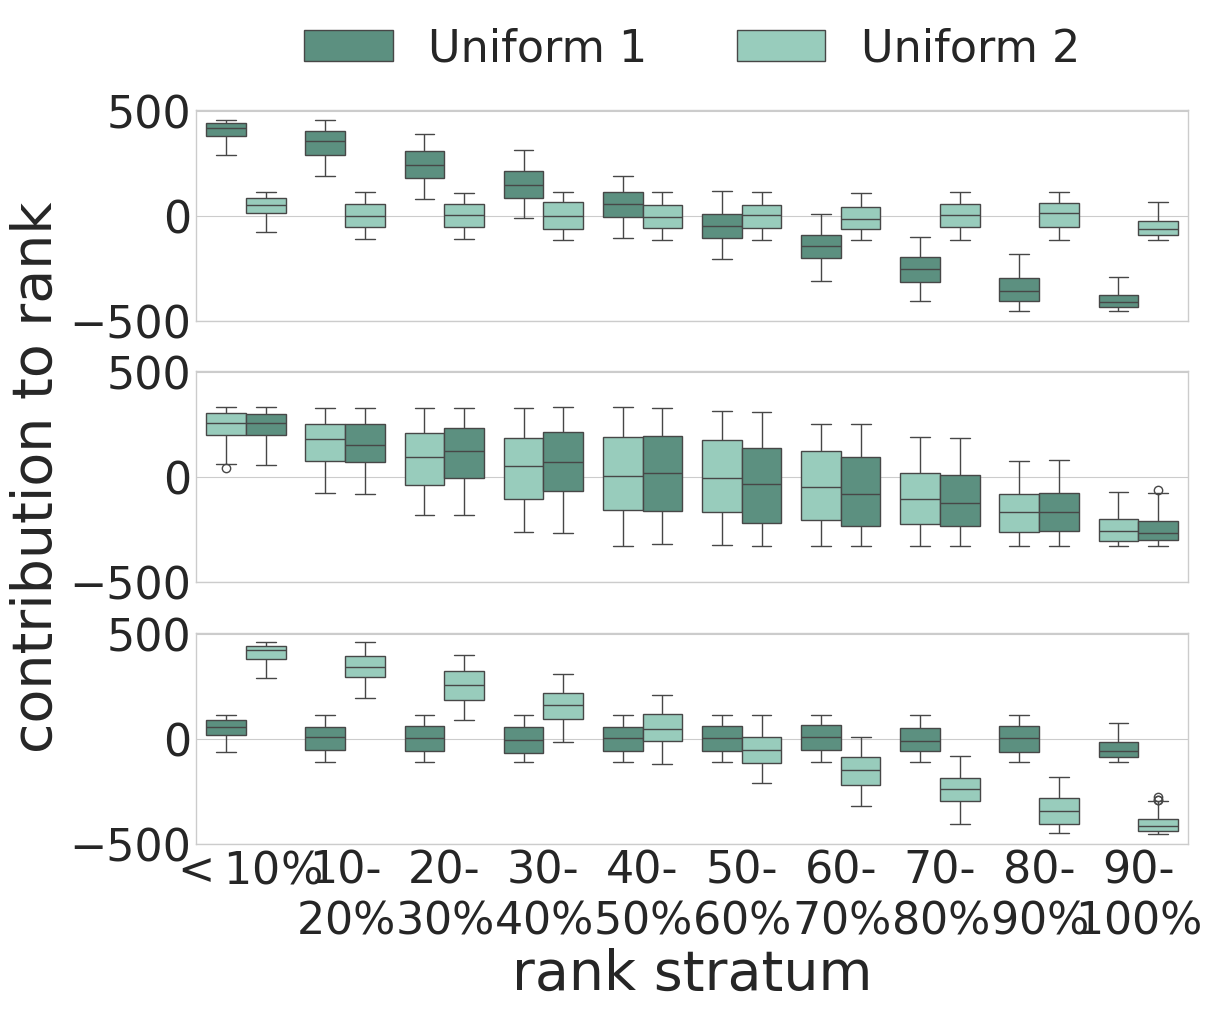

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

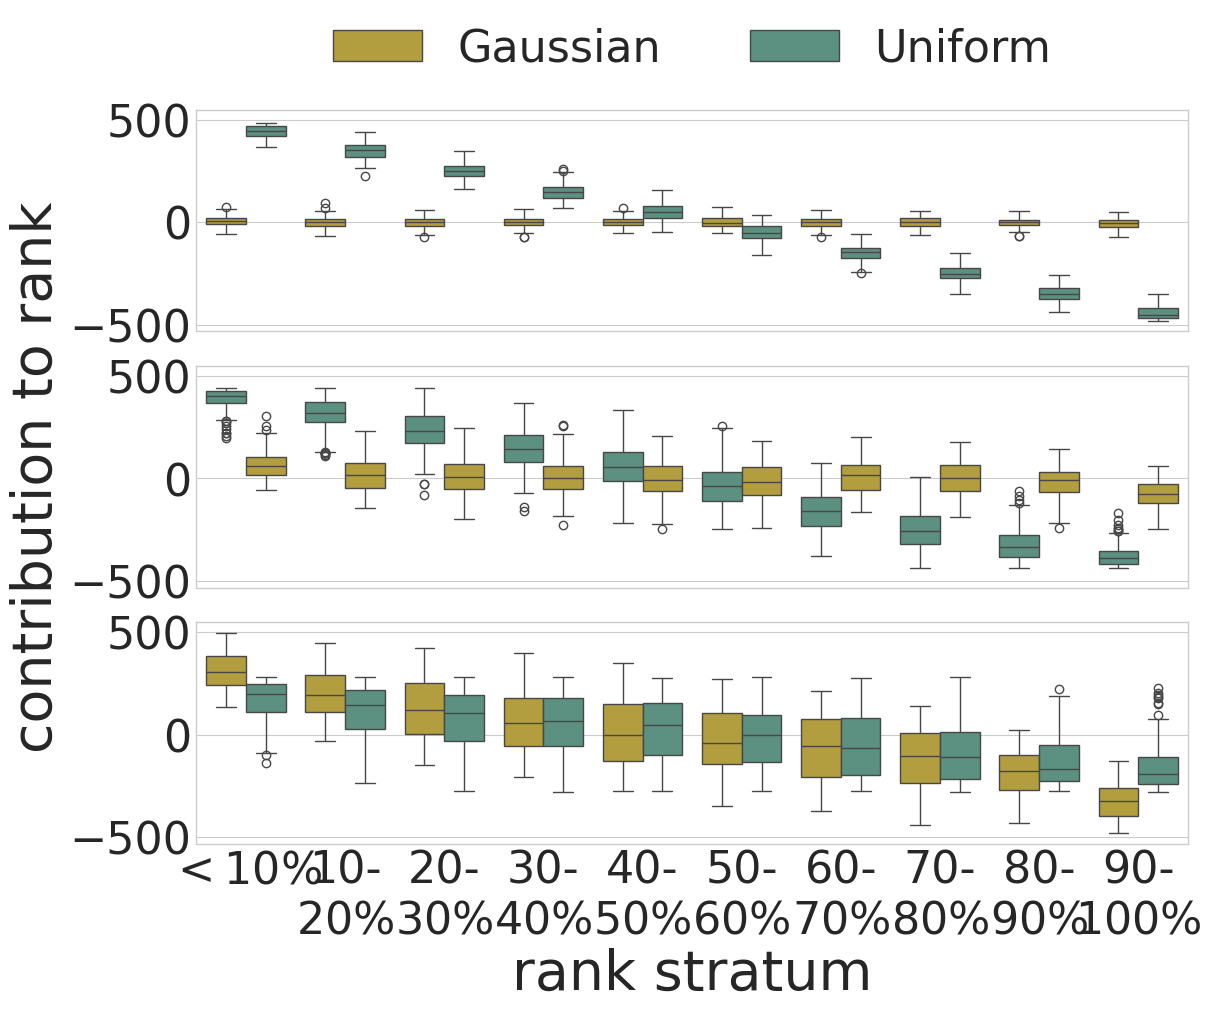

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

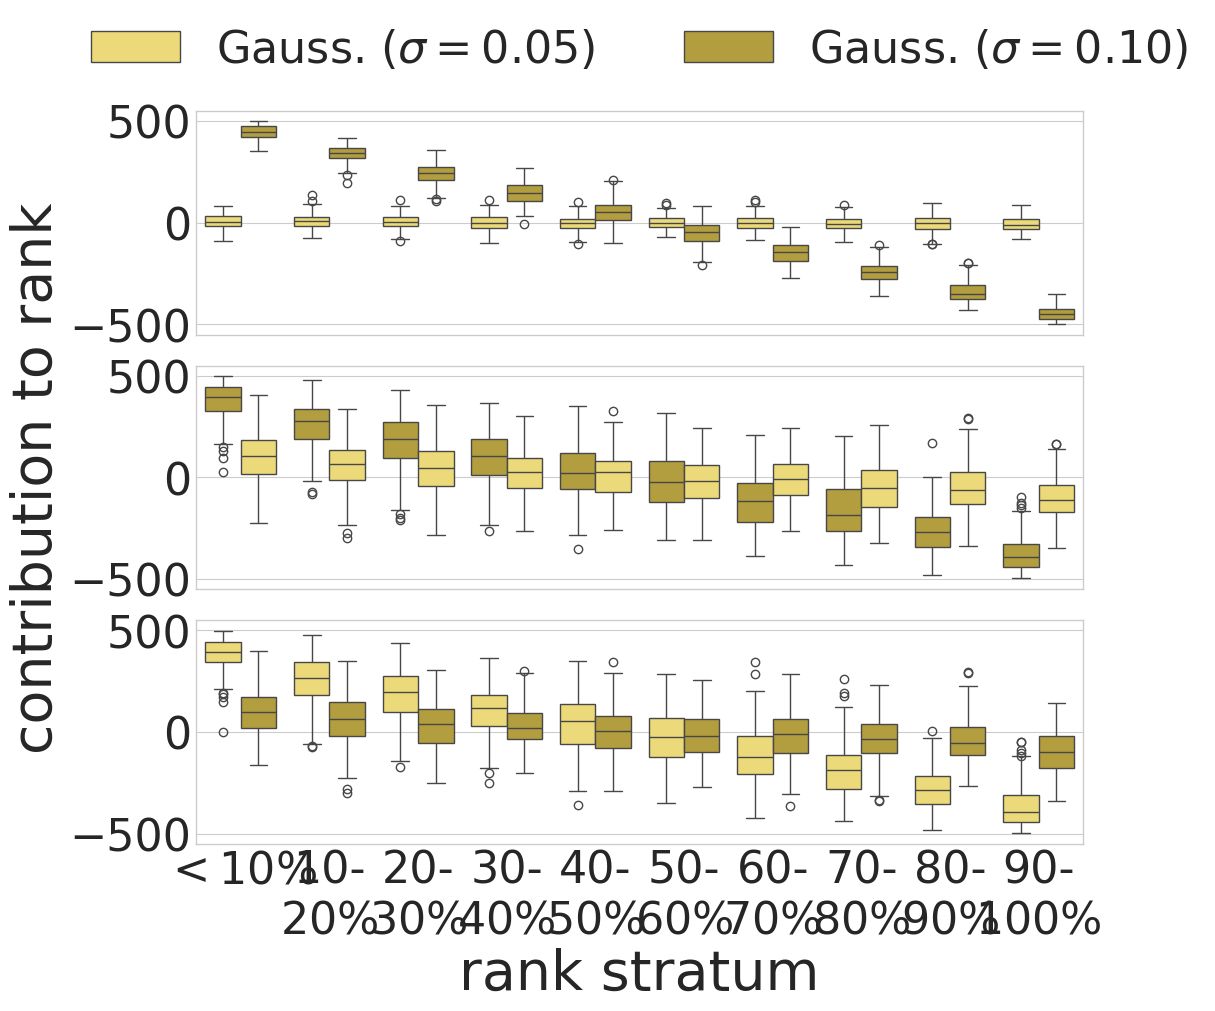

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

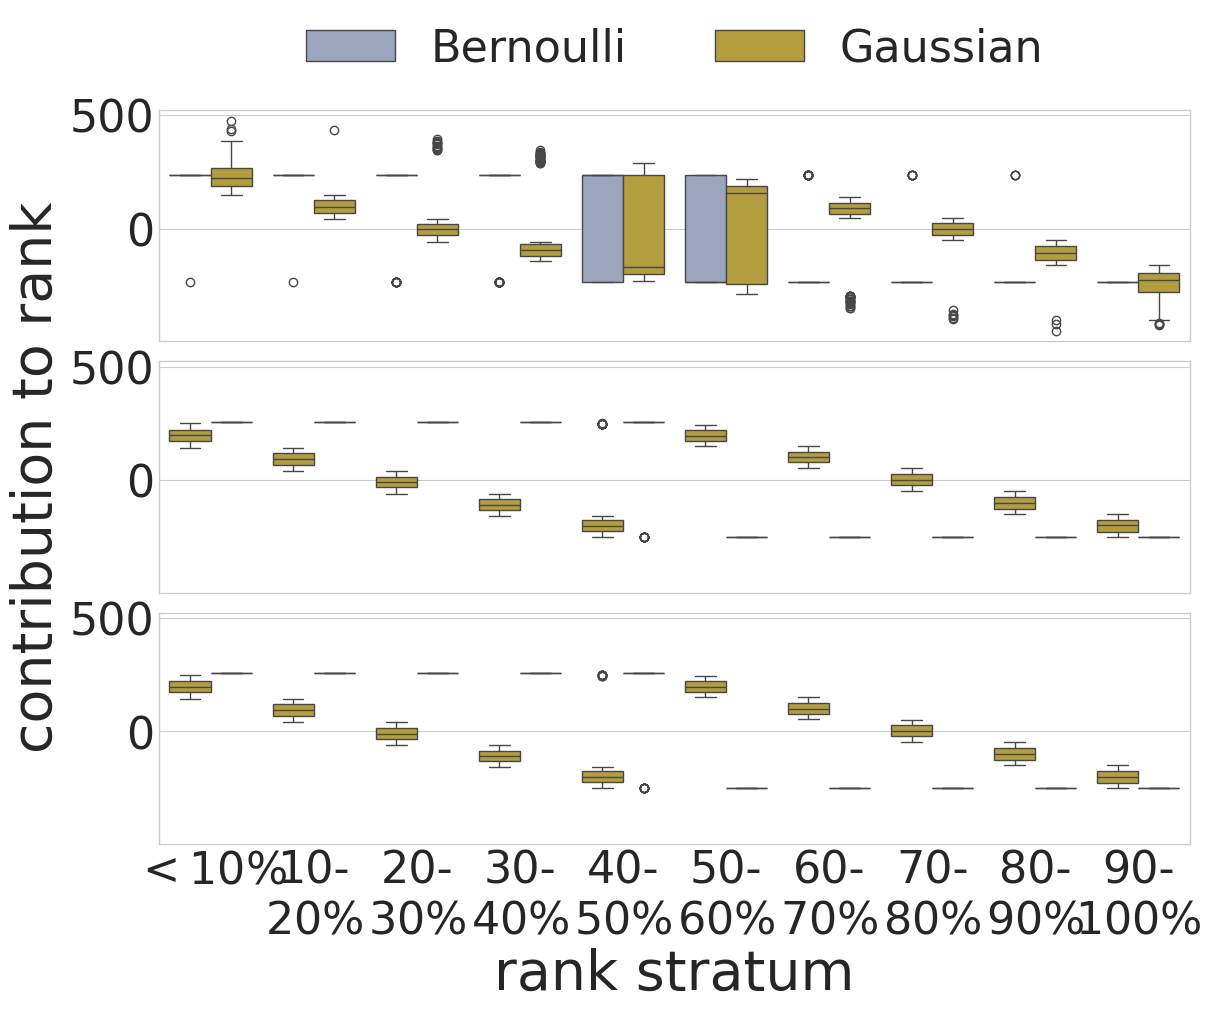

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

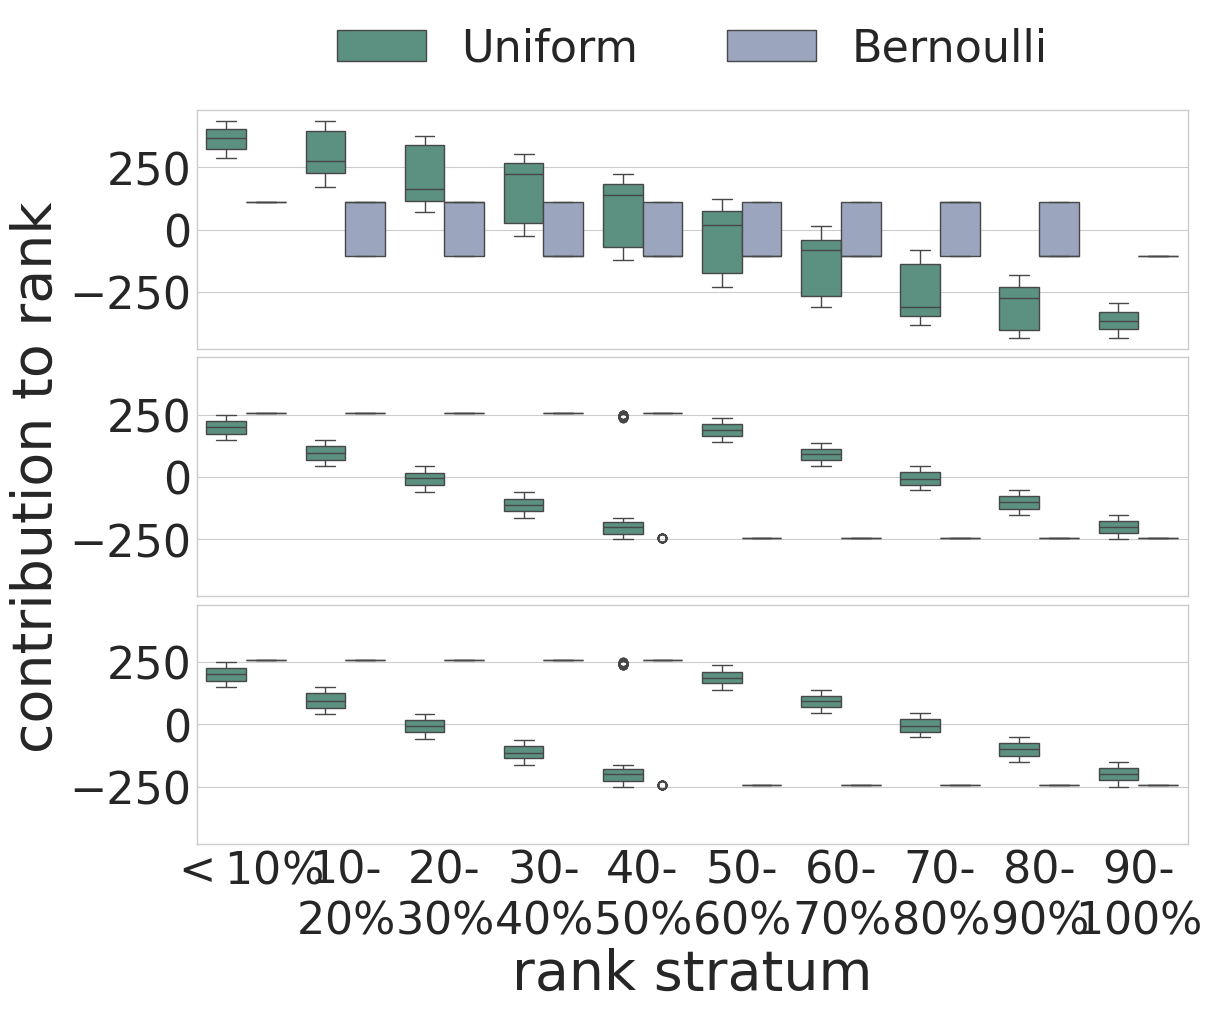

In [10]:
for i in range(1, 6):
    ranks_analysis_shapley(f"df{i}", qoi_name="rankingqoi", contribution_to="rank")

# Top-K

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

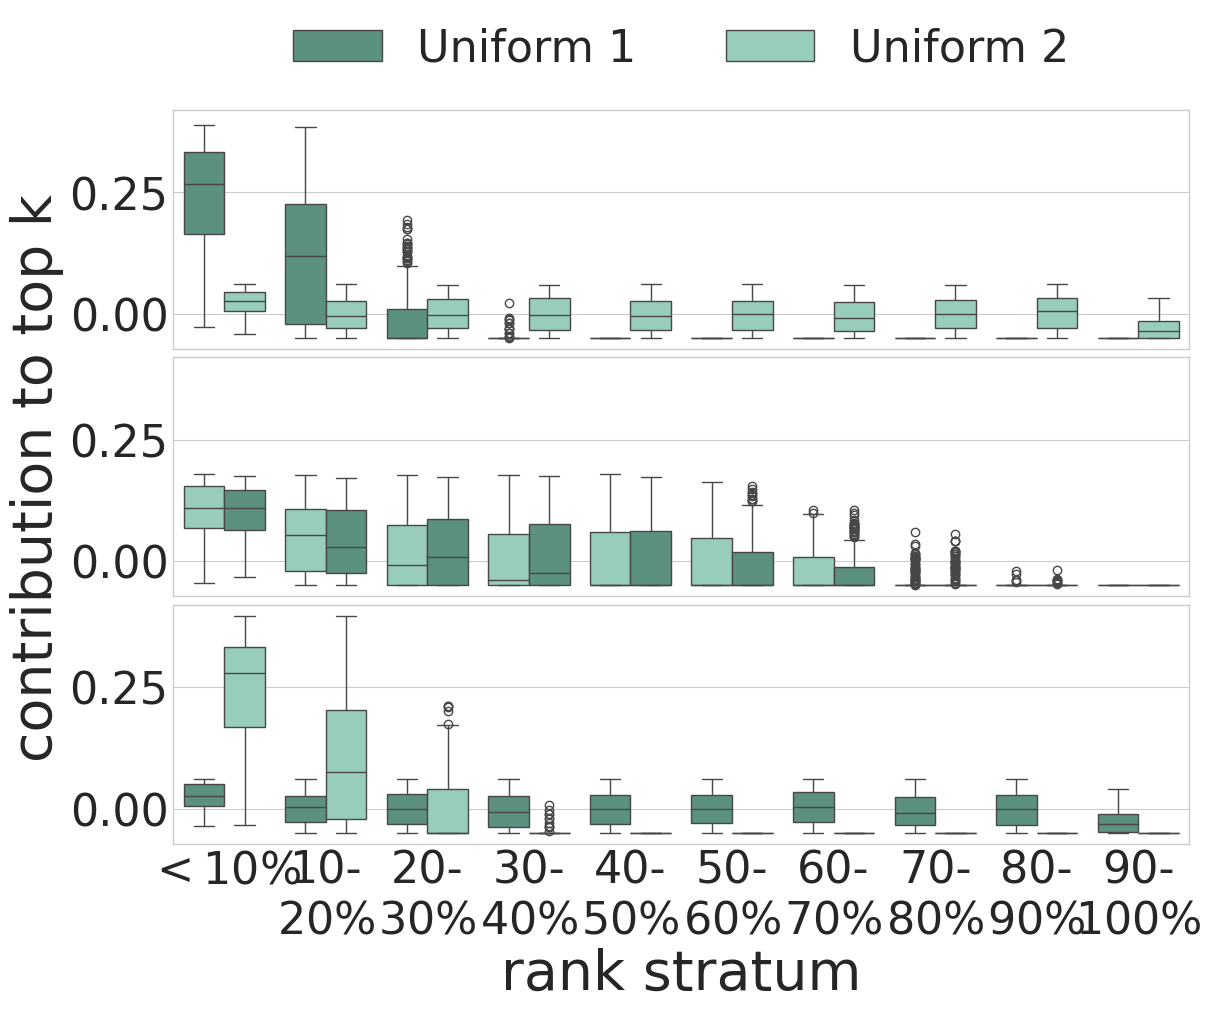

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

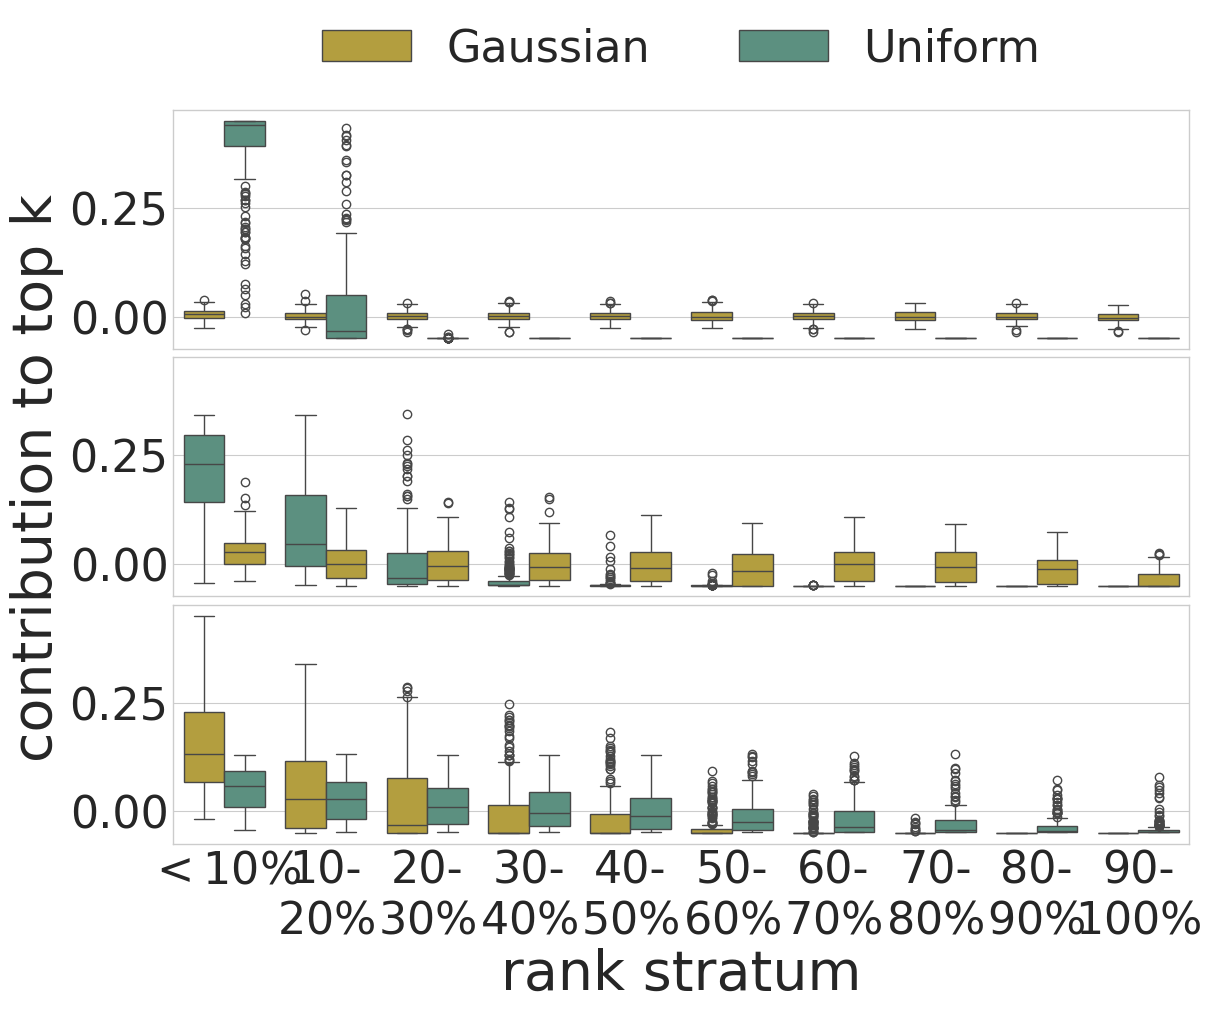

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

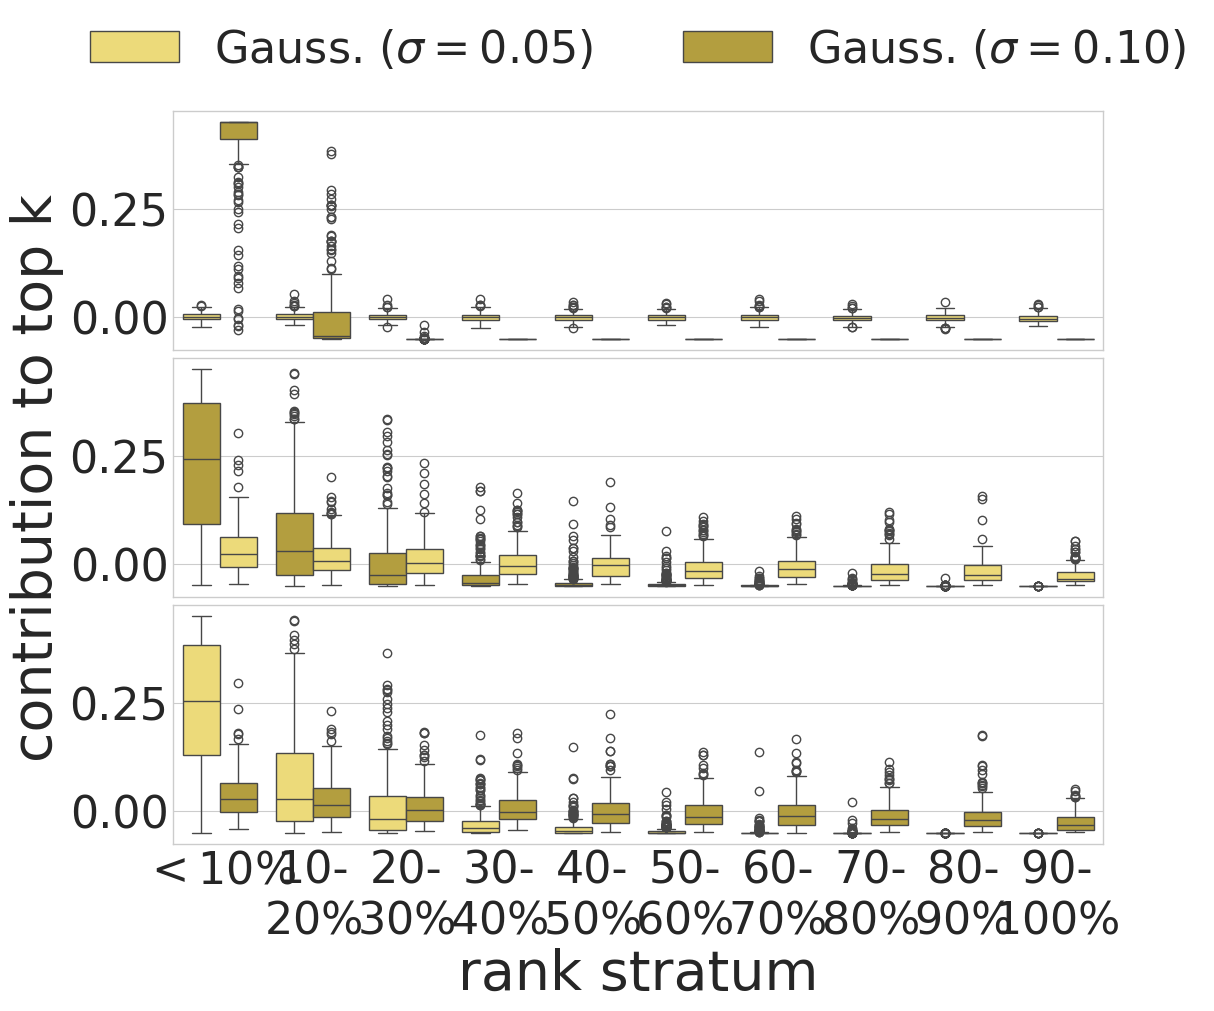

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

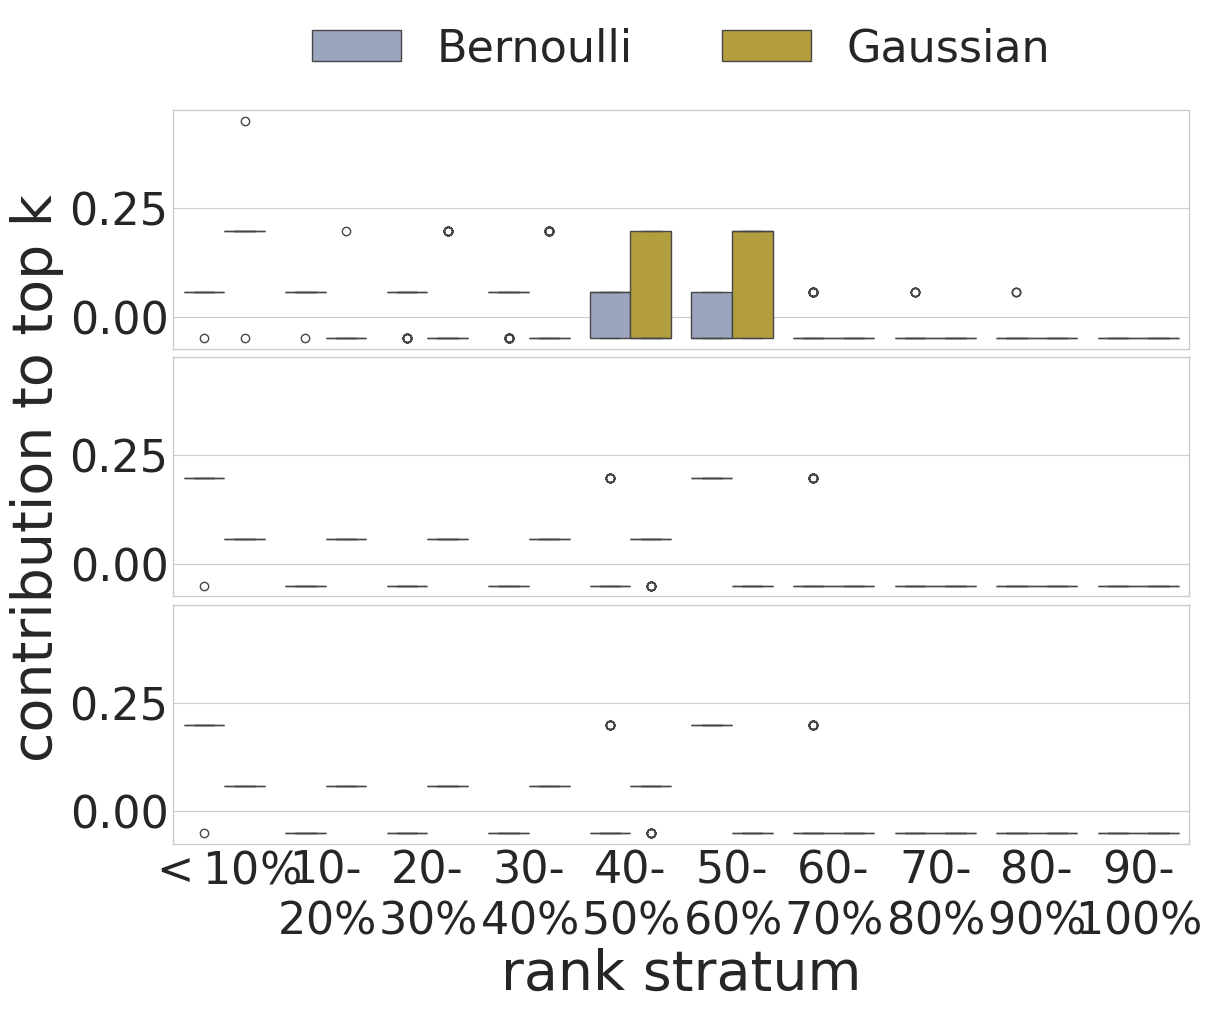

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

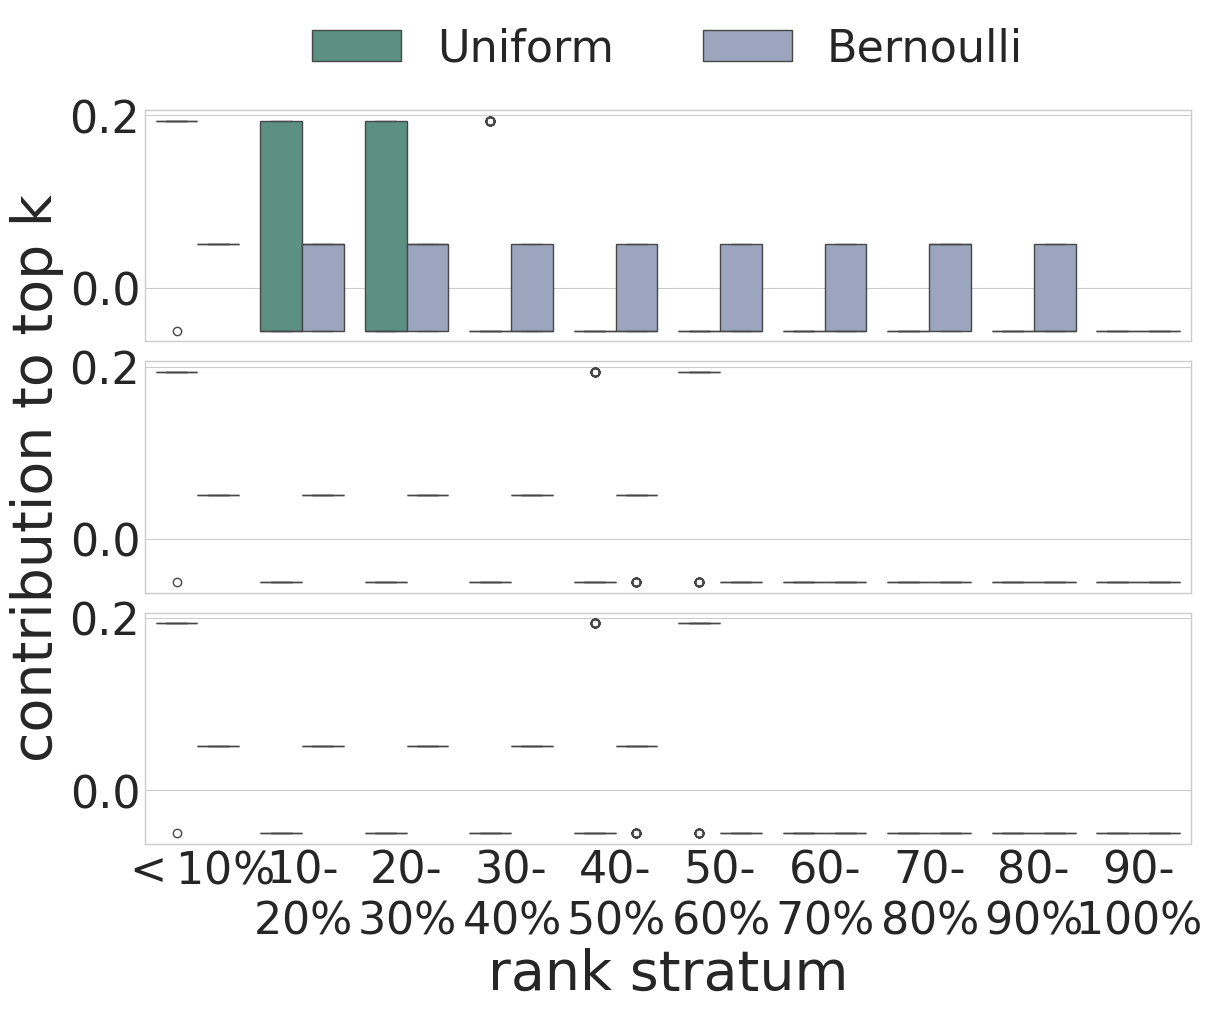

In [5]:
for i in range(1, 6):
    ranks_analysis_shapley(f"df{i}", qoi_name="topkqoi", contribution_to="top k")

# Score

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

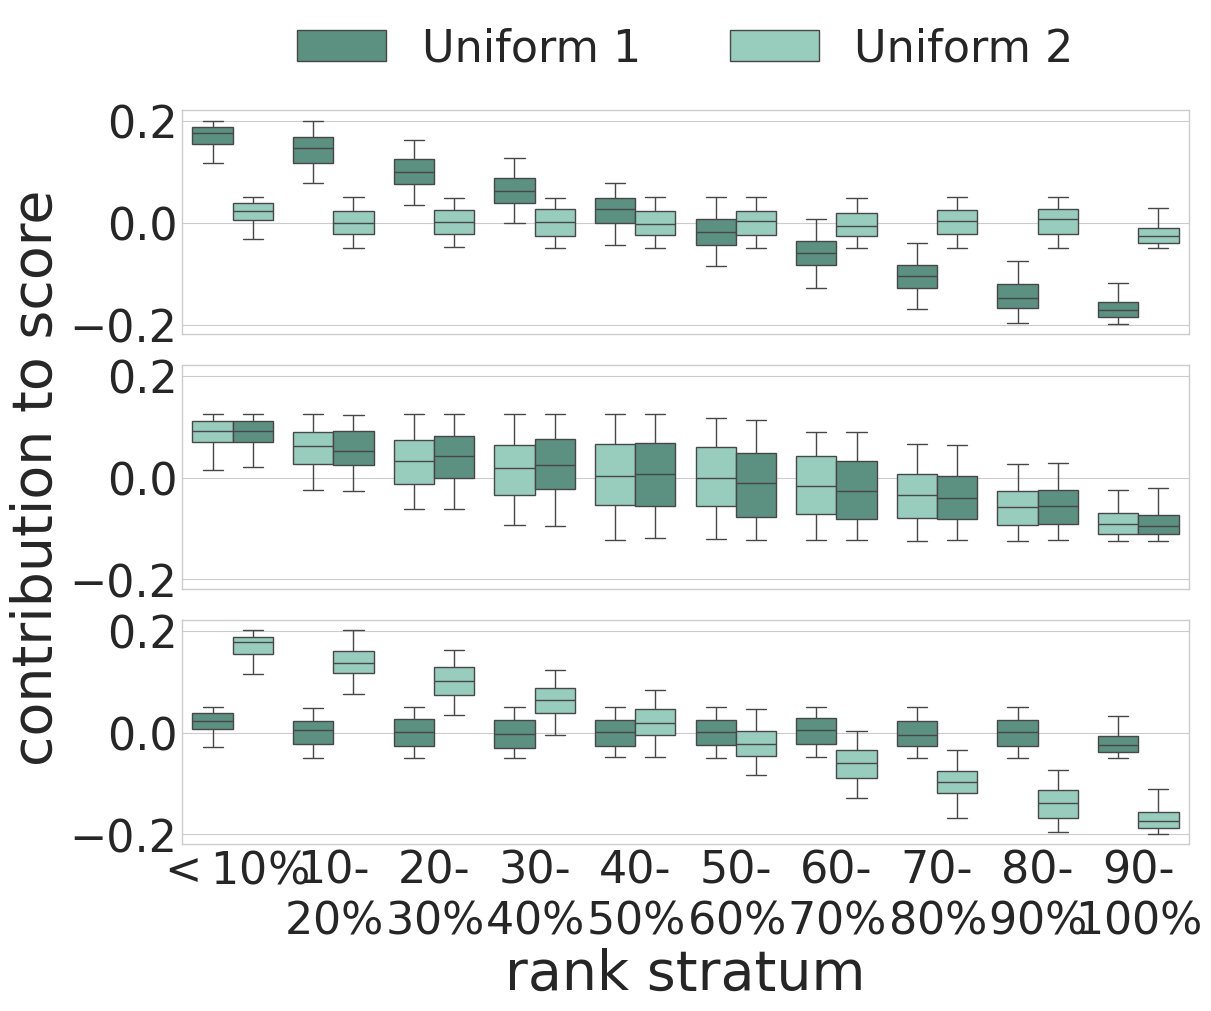

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

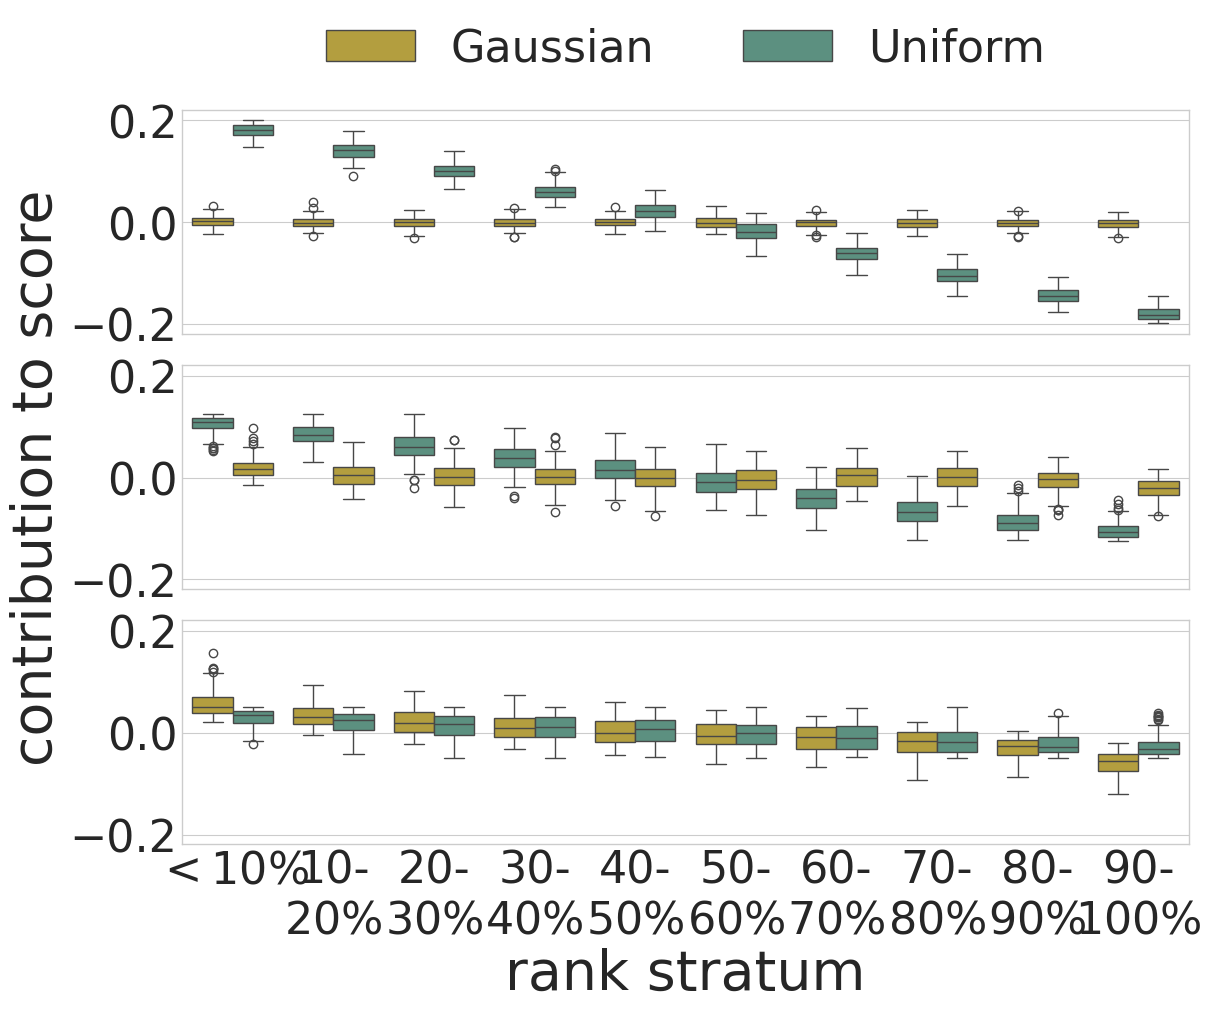

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

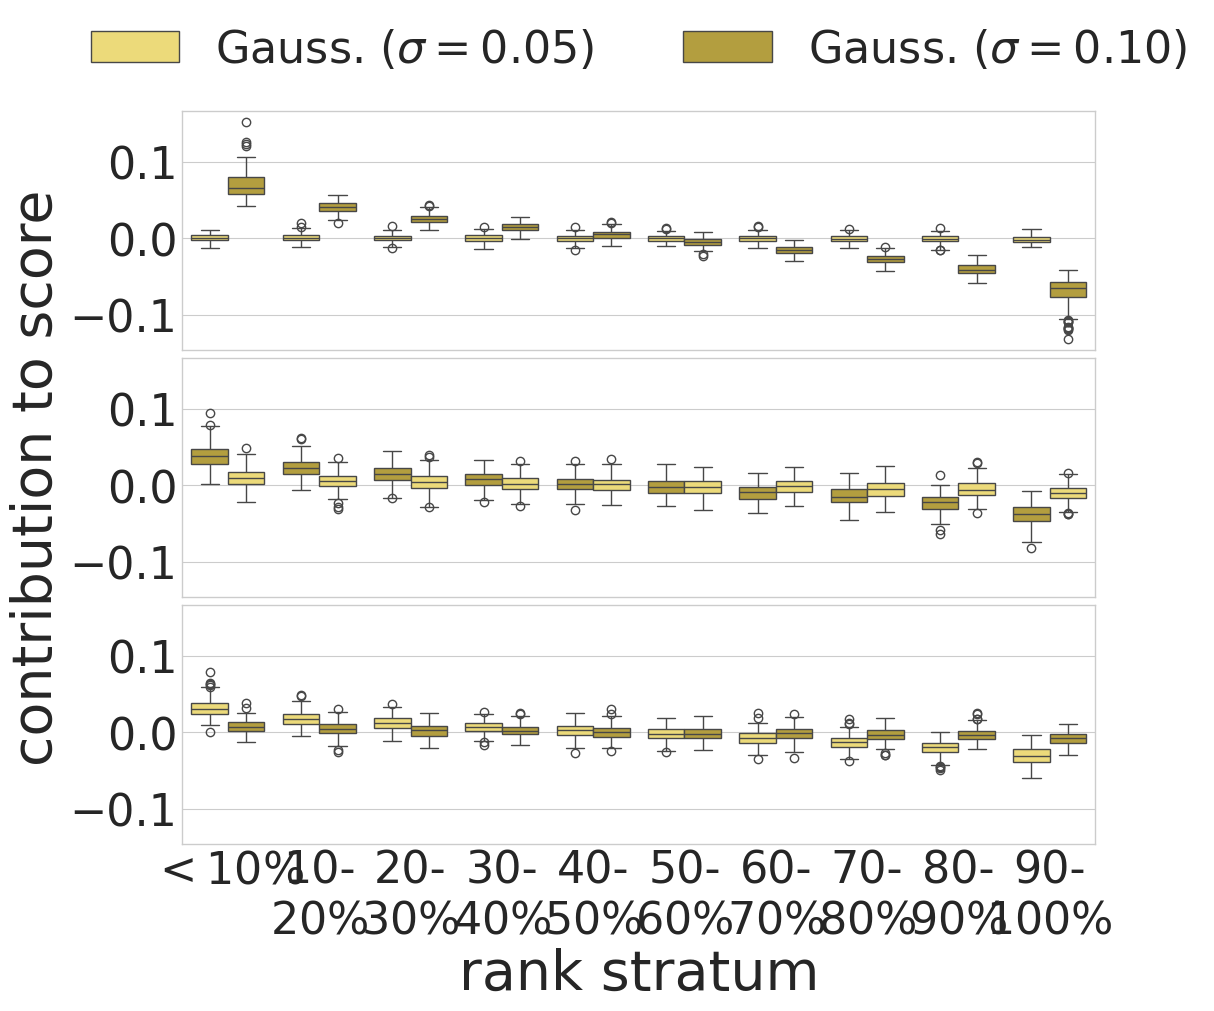

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

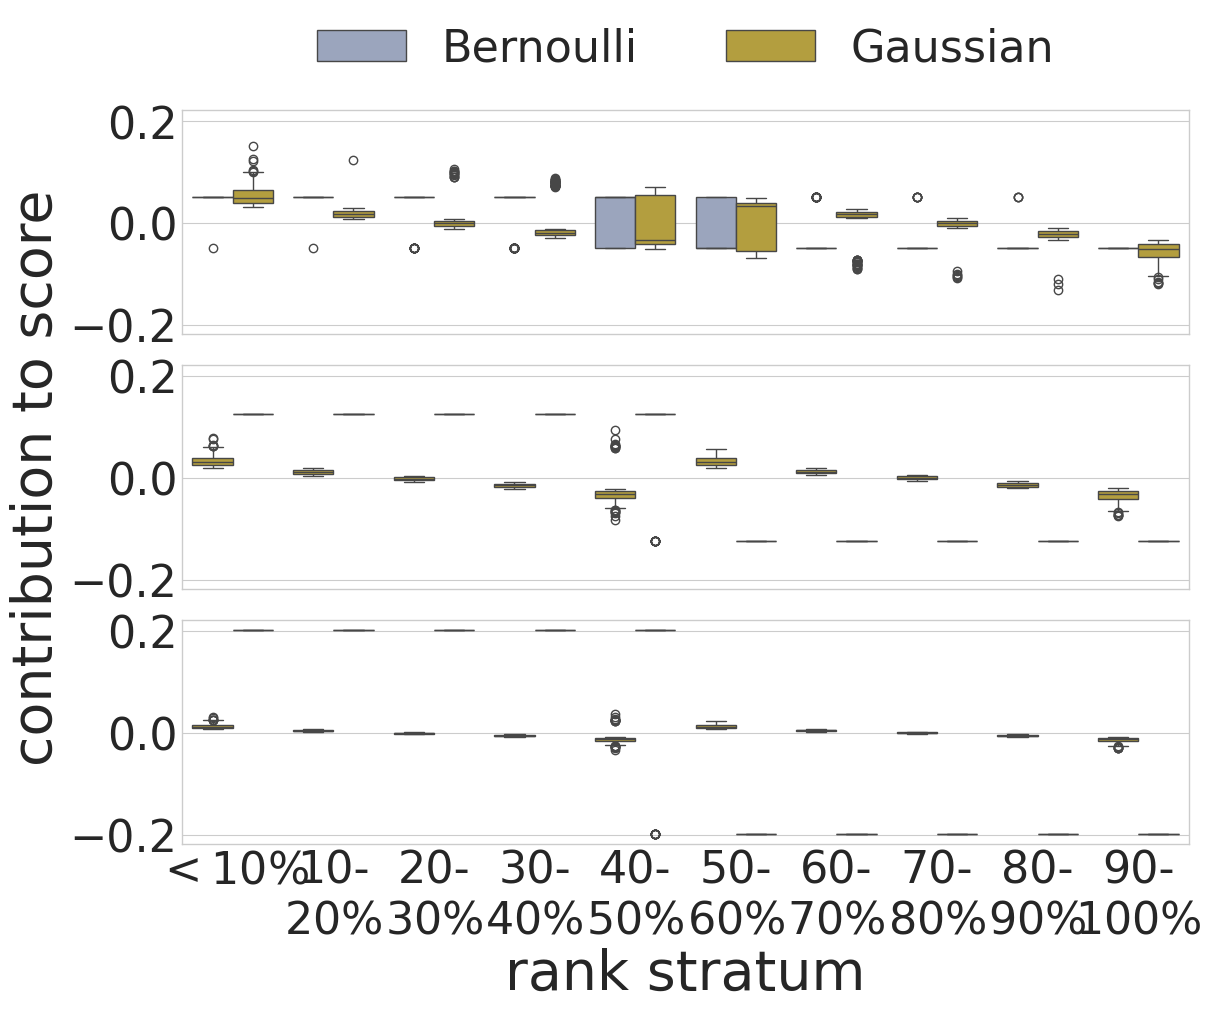

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

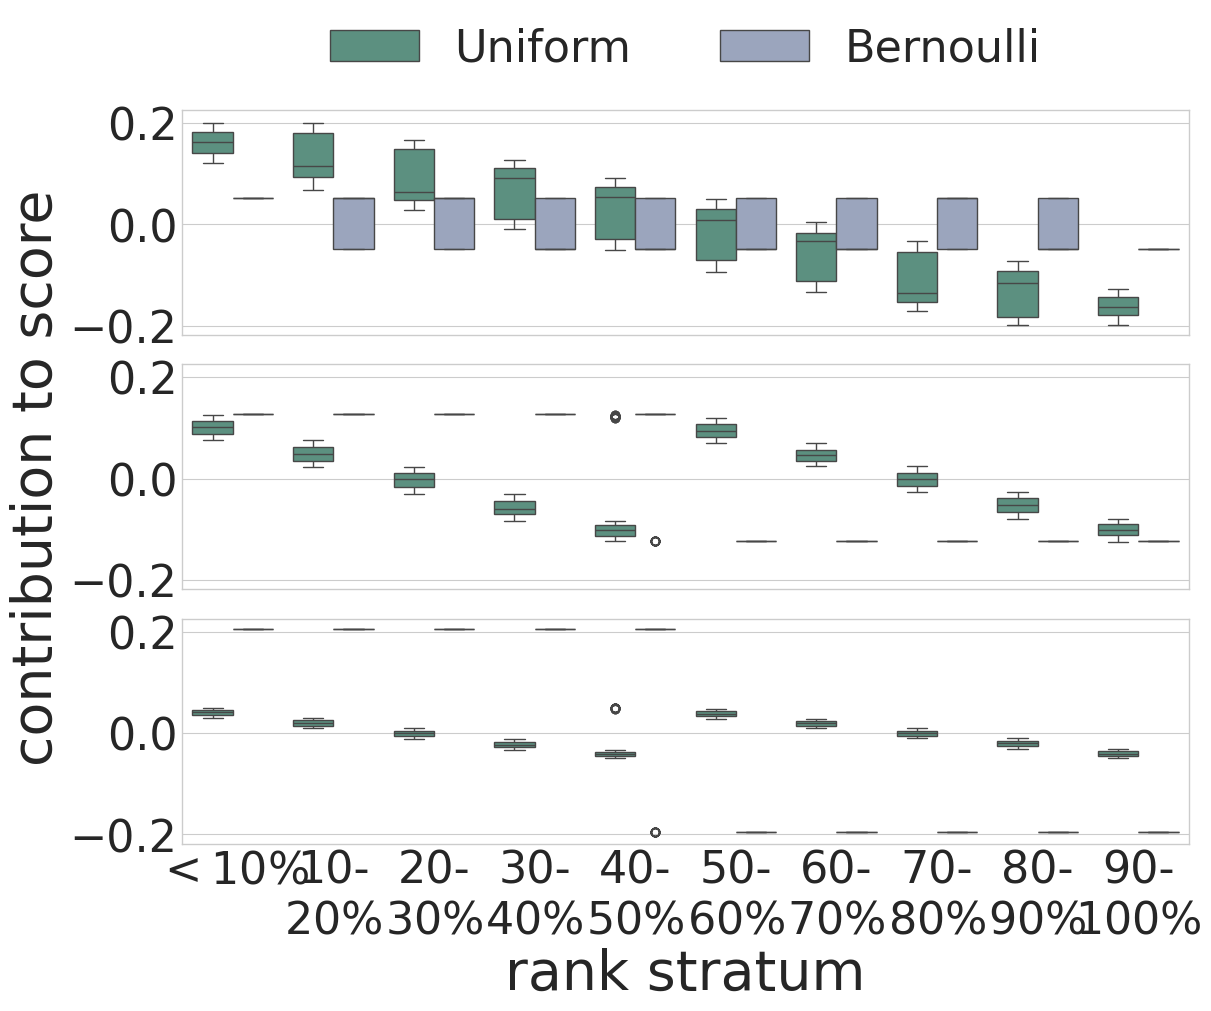

In [6]:
for i in range(1, 6):
    ranks_analysis_shapley(f"df{i}", qoi_name="rankingscoreqoi", contribution_to="score")

# Many dfs figure from paper

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

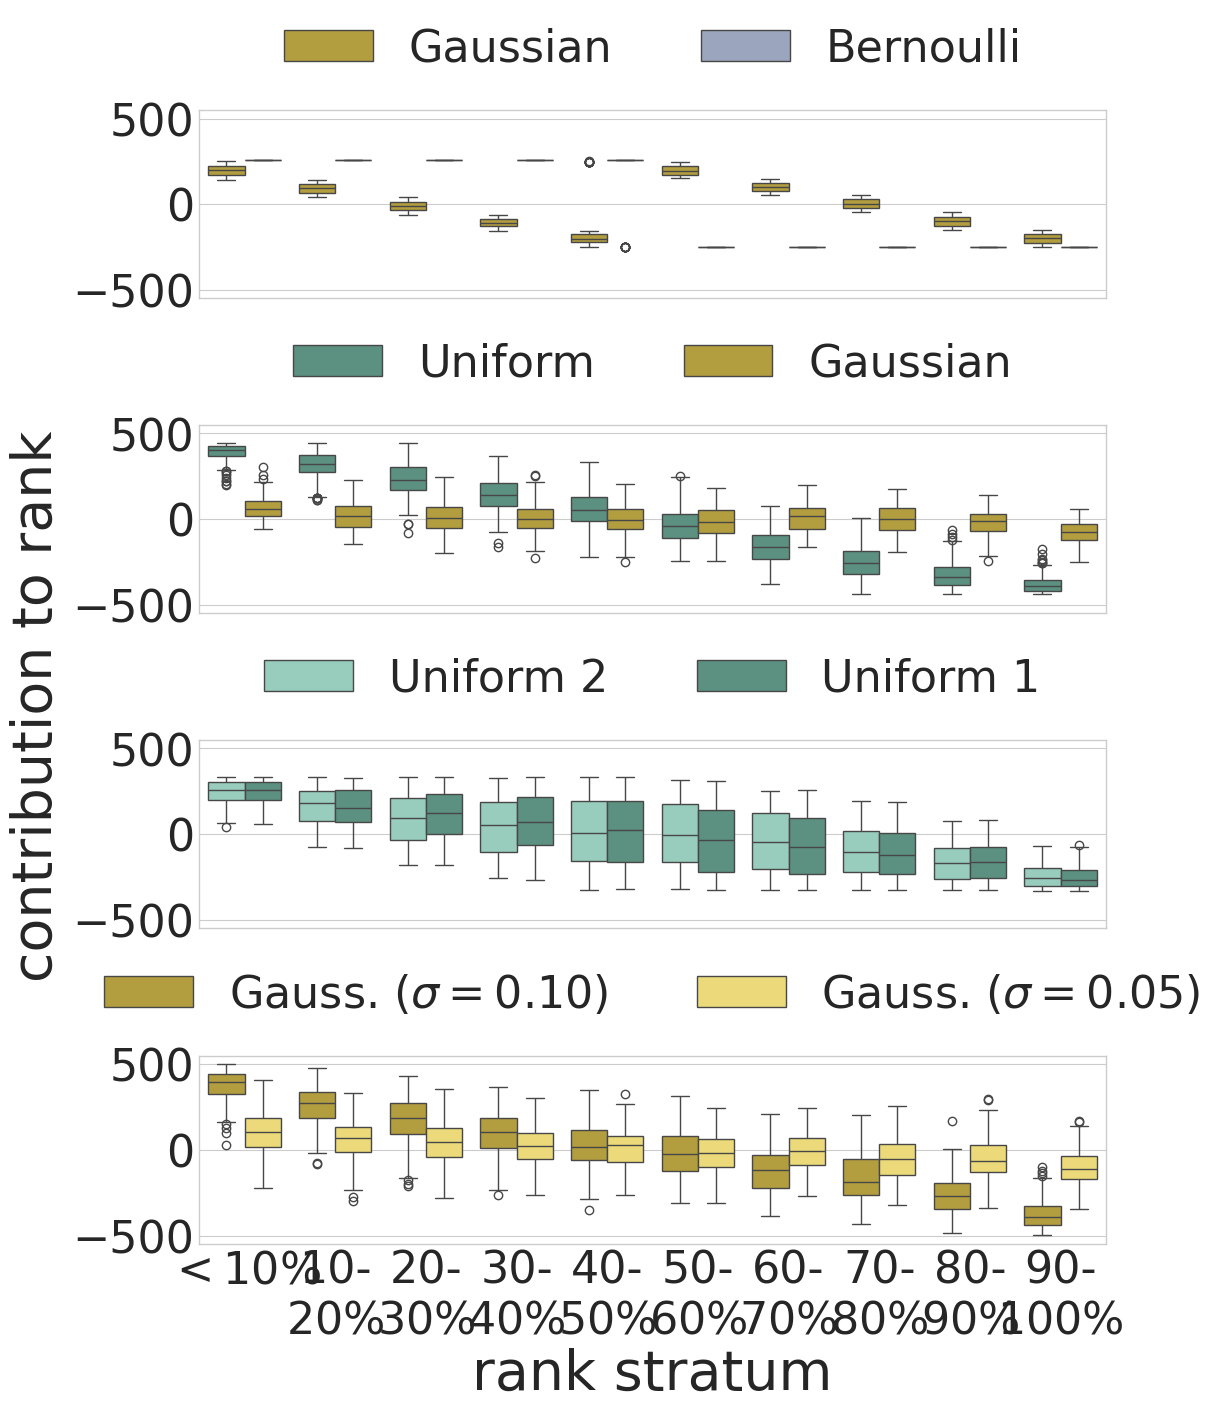

In [7]:
df1 = pd.read_csv(directory + f'/df1_rankingqoi_50.csv', index_col="Unnamed: 0")
df2 = pd.read_csv(directory + f'/df2_rankingqoi_50.csv', index_col="Unnamed: 0")
df3 = pd.read_csv(directory + f'/df3_rankingqoi_50.csv', index_col="Unnamed: 0")
df4 = pd.read_csv(directory + f'/df4_rankingqoi_50.csv', index_col="Unnamed: 0")

rows = df1.shape[0]
buckets = 10


# Make 5 rank buckets for all datasets
df1['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df1['ranking']
]
df2['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df2['ranking']
]
df3['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df3['ranking']
]

df4['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df4['ranking']
]


# Preprocess datasets
df1.rename(columns=mapper, inplace=True)
df2.rename(columns=mapper, inplace=True)
df3.rename(columns=mapper, inplace=True)
df4.rename(columns=mapper, inplace=True)

df1 = df1.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df2 = df2.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df3 = df3.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df4 = df4.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})

df1 = df1.sort_values("rank stratum")
df2 = df2.sort_values("rank stratum")
df3 = df3.sort_values("rank stratum")
df4 = df4.sort_values("rank stratum")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 14), sharey=True, sharex=True, constrained_layout=True)
# plt.subplots_adjust(hspace=0.5)

graph = sns.boxplot(ax=axs[0], x=df4['rank stratum'], y=df4['Contribution'],
                    hue=df4['Feature'], palette=palette)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
graph.set_ylabel(None)
graph.set_xlabel(None)

graph = sns.boxplot(ax=axs[1], x=df2['rank stratum'], y=df2['Contribution'],
                    hue=df2['Feature'], palette=palette)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
graph.set_ylabel(None)
graph.set_xlabel(None)

graph = sns.boxplot(ax=axs[2], x=df1['rank stratum'], y=df1['Contribution'],
                    hue=df1['Feature'], palette=palette)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
graph.set_ylabel(None)
graph.set_xlabel(None)

graph = sns.boxplot(ax=axs[3], x=df3['rank stratum'], y=df3['Contribution'],
                    hue=df3['Feature'], palette=palette)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
graph.set_ylabel(None)

fig.supylabel(f"contribution to rank", fontsize=40)

plt.show()

# Single df analysis

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

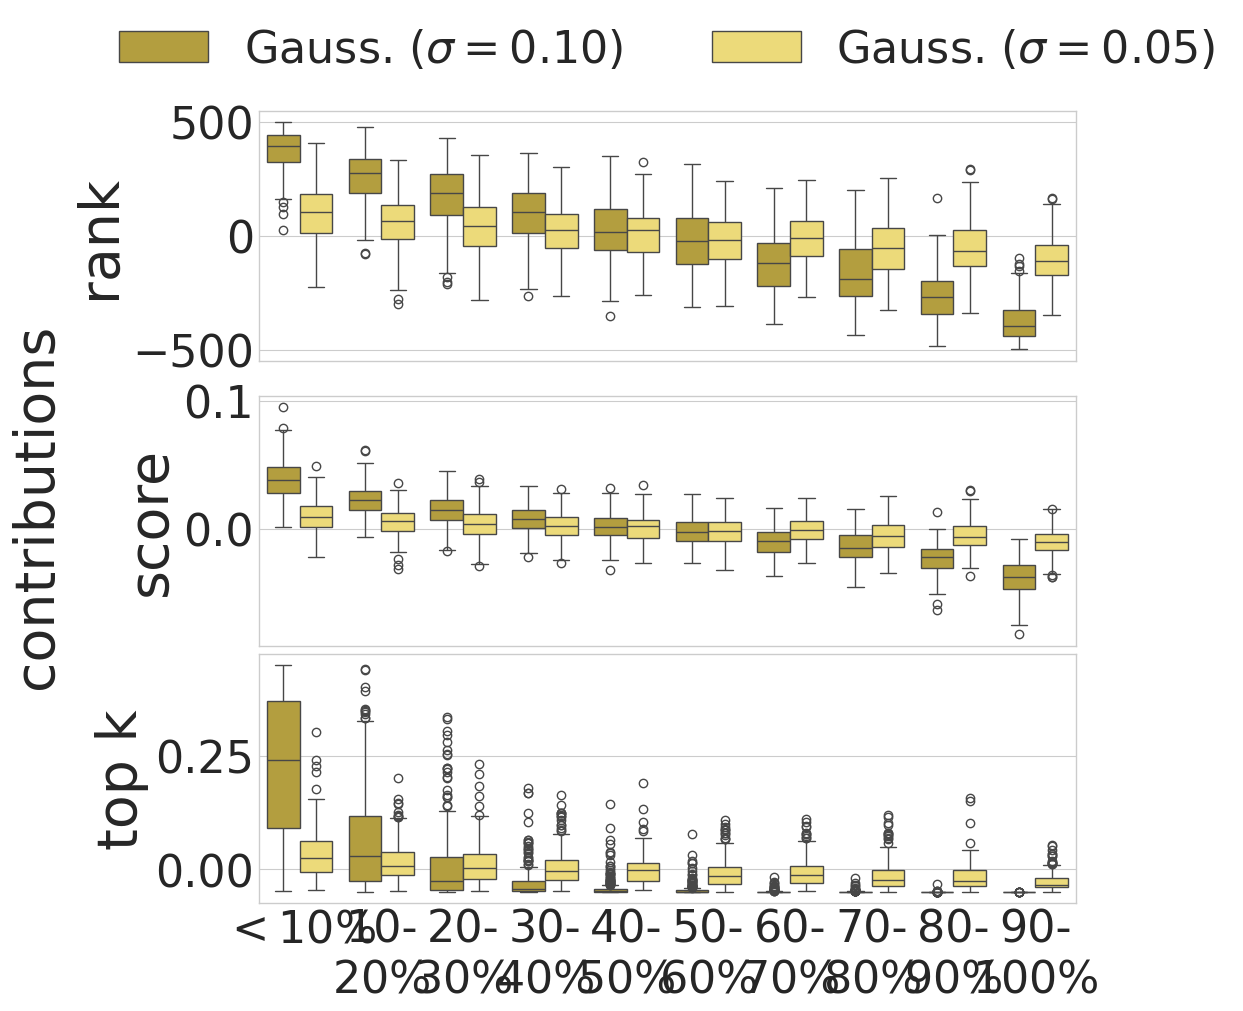

In [8]:
df1 = pd.read_csv(directory + f'/df3_rankingqoi_50.csv', index_col="Unnamed: 0")
df2 = pd.read_csv(directory + f'/df3_rankingscoreqoi_50.csv', index_col="Unnamed: 0")
df3 = pd.read_csv(directory + f'/df3_topkqoi_50.csv', index_col="Unnamed: 0")

rows = df1.shape[0]
buckets = 10

# Make 5 rank buckets for all datasets
df1['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df1['ranking']
]
df2['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df2['ranking']
]
df3['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df3['ranking']
]

# Preprocess datasets
df1.rename(columns=mapper, inplace=True)
df2.rename(columns=mapper, inplace=True)
df3.rename(columns=mapper, inplace=True)

df1 = df1.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df2 = df2.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df3 = df3.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})

df1 = df1.sort_values("rank stratum")
df2 = df2.sort_values("rank stratum")
df3 = df3.sort_values("rank stratum")

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharey=False, sharex=True, constrained_layout=True)
# plt.subplots_adjust(hspace=0.5)

graph = sns.boxplot(ax=axs[0], x=df1['rank stratum'], y=df1['Contribution'],
                    hue=df1['Feature'], palette=palette)
graph.set_ylabel("rank")
graph.set_xlabel(None)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

graph = sns.boxplot(ax=axs[1], x=df2['rank stratum'], y=df2['Contribution'],
                    hue=df2['Feature'], palette=palette)
graph.set_ylabel("score")
graph.set_xlabel(None)
graph.get_legend().remove()

graph = sns.boxplot(ax=axs[2], x=df3['rank stratum'], y=df3['Contribution'],
                    hue=df3['Feature'], palette=palette)
graph.set_ylabel("top k")
graph.set_xlabel(None)
graph.get_legend().remove()

fig.supylabel(f"contributions", fontsize=40)

plt.show()

# Custom plots

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font f

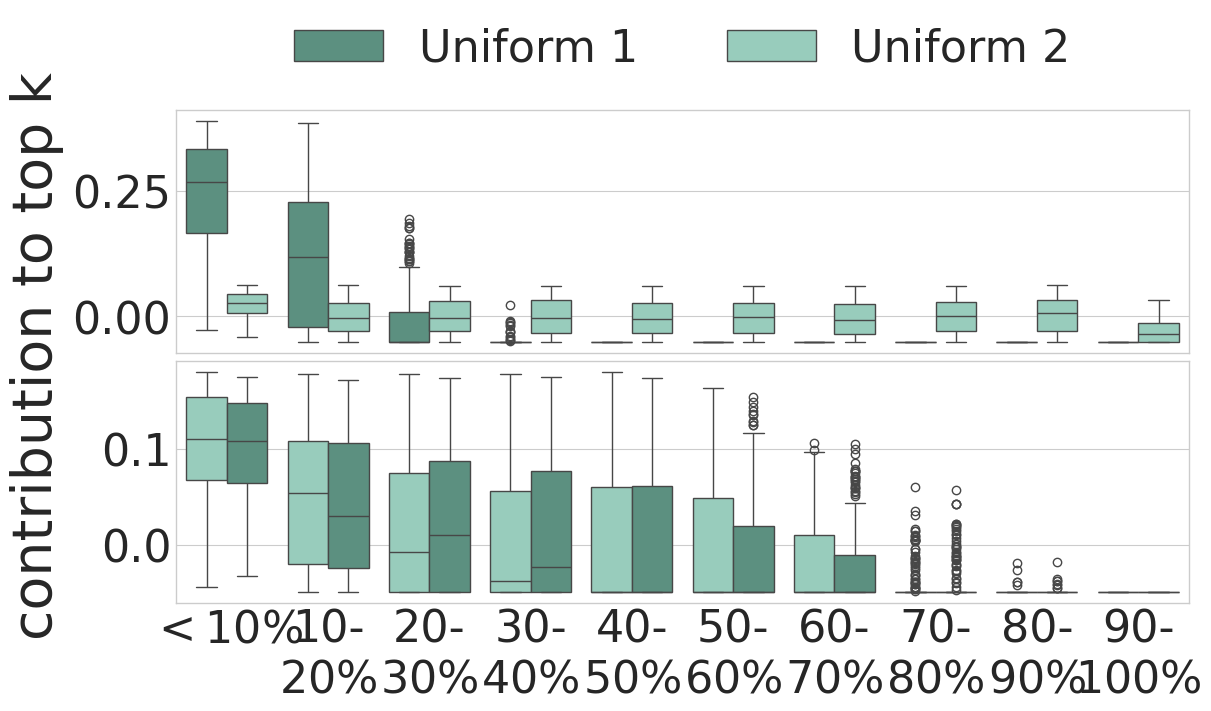

In [9]:
df1 = pd.read_csv(directory + f'/df1_topkqoi_80.csv', index_col="Unnamed: 0")
df2 = pd.read_csv(directory + f'/df1_topkqoi_50.csv', index_col="Unnamed: 0")

rows = df1.shape[0]
buckets = 10

# Make 5 rank buckets for all datasets
df1['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df1['ranking']
]
df2['rank stratum'] = [
    r"$<10\%$" if math.floor((rank - 1) / (rows / buckets)) == 0 
    else str(math.floor((rank - 1) / (rows / buckets)) * 10) + "-\n" + str(math.floor(((rank - 1) / (rows / buckets)) + 1) * 10) + r"$\%$" 
    for rank in df2['ranking']
]

# Preprocess datasets
df1.rename(columns=mapper, inplace=True)
df2.rename(columns=mapper, inplace=True)

df1 = df1.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})
df2 = df2.drop(columns=["score", "ranking"]).melt(id_vars=["rank stratum"]).rename(columns={"variable": "Feature", "value": "Contribution"})

df1 = df1.sort_values("rank stratum")
df2 = df2.sort_values("rank stratum")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 7), sharey=False, sharex=True, constrained_layout=True)
# plt.subplots_adjust(hspace=0.5)

graph = sns.boxplot(ax=axs[0], x=df1['rank stratum'], y=df1['Contribution'],
                    hue=df1['Feature'], palette=palette)
graph.set_ylabel(None)
graph.set_xlabel(None)
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

graph = sns.boxplot(ax=axs[1], x=df2['rank stratum'], y=df2['Contribution'],
                    hue=df2['Feature'], palette=palette)
graph.set_ylabel(None)
graph.set_xlabel(None)
graph.get_legend().remove()

fig.supylabel(f"contribution to top k", fontsize=40)

plt.show()